# calculate ACC and NMAE within each LME along the vertical direction

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import numpy as np
from scipy.stats import pearsonr
from matplotlib import cm,colors,gridspec
import scipy.signal as sgl
import os

In [2]:
USER = os.environ['USER']

## read ACC NMAE for each component

In [3]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
varr1,varr2,varr3 = ['O2','T','S']

## plot vertical ACC and NMAE values for each LME

In [4]:
var = 'Phi'
var_name = 'Phi_6'

In [5]:
filename = f'{datadir}/DPLE-FOSI_hindcast_Phi_Eo_space_horizontal_mean_LME11_1948-2017_yearly.nc'
ds_hind = xr.open_dataset(filename)

In [6]:
z_t = -ds_hind['z_t'].values[:35]/1e2 
zt = np.zeros(len(z_t)+1);zt[1:] = z_t.copy()
dzt = -(zt[1:] - zt[:-1])
ddzt = np.zeros(len(z_t))
ddzt[0] = dzt[0]
for ii in range(1,len(z_t)):
    ddzt[ii] = dzt[ii] - ddzt[ii-1]
# upper and lower depth of each layer
z_u = z_t + ddzt
z_d = z_t - ddzt
#
z_t[0] = 0

In [7]:
from matplotlib import rc, gridspec
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]
cols = ['gold','orangered','orangered','dodgerblue','gold','dodgerblue','orangered','dodgerblue','gold','orangered','dodgerblue']

In [8]:
import matplotlib as mpl
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [9]:
new_cmapt = truncate_colormap('GnBu_r', 0.1, 1.0)

1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
65 10


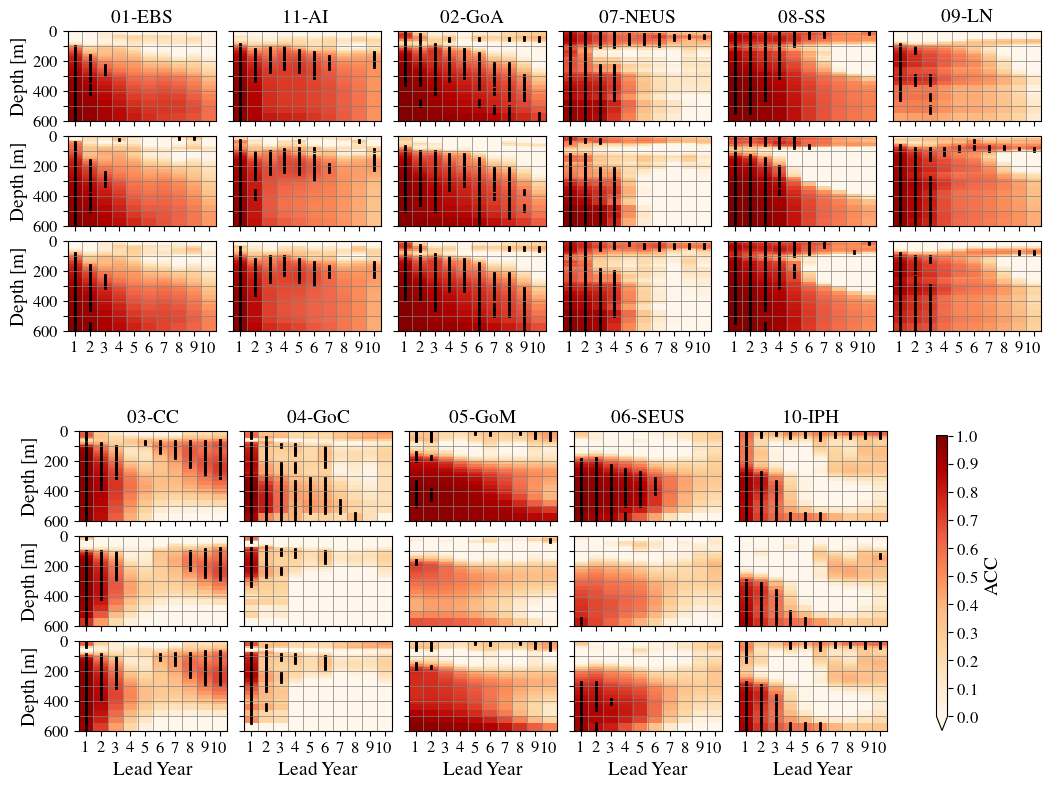

In [13]:
fig = plt.figure(figsize=[11, 10])
gs = gridspec.GridSpec(1, 3)
#
ldd,ztt = np.meshgrid(np.arange(0.5,10,1),z_t)
cmin = 0.;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev; vct = np.arange(cmin, cmax+dc, dc)
pal_normt = colors.BoundaryNorm(vct, ncolors=256, clip = False)
##
newbox = list(zip(boxnb, range(len(boxnb))))
boxloc = np.ones([len(boxnb),2])
boxloc[0,0],boxloc[10,0],boxloc[1,0],boxloc[6,0],boxloc[7,0],boxloc[8,0] = np.arange(0.06,0.96,0.15)
boxloc[0,1],boxloc[10,1],boxloc[1,1],boxloc[6,1],boxloc[7,1],boxloc[8,1] = 0.5*np.ones(6)
boxloc[2,0],boxloc[3,0],boxloc[4,0],boxloc[5,0],boxloc[9,0] = np.arange(0.07,0.82,0.15)
boxloc[2,1],boxloc[3,1],boxloc[4,1],boxloc[5,1],boxloc[9,1] = 0.10*np.ones(5)
#
nphi = 1
for box, ii in newbox:
    print(box,ii)
    for tt,varr in [[2,'O2'],[1,'T'],[0,'S']]:
        filename = f'{datadir}/DPLE_LME_box01-11_ACC_NMAE_Phi_components_{varr}_Eo_space_horizontal_mean_leadyear_1-10.nc'
        ds = xr.open_dataset(filename)
        corr_d = ds['corr_d'].values[nphi,ii]
        rcri_d = ds['rcri_d'].values[nphi,ii]
        #
        dmask = corr_d > rcri_d
        #
        ax = fig.add_axes([boxloc[ii][0],boxloc[ii][1]+0.105*tt,0.135,0.09])
        #cd1 = ax.pcolor(ldd.T,ztt.T,  corr_d[jj,ii], cmap=cm.OrRd, label=boxna[ii])
        #if tt > 0:
        cd1 = ax.pcolor(ldd.T,ztt.T,corr_d, cmap=cm.OrRd, vmin = 0.,vmax = 1.)
        #else:
        #    cd2 = ax.pcolor(ldd.T,ztt.T,corr_d, cmap=cm.GnBu, vmin = 0.,vmax = 1.)
        #ztt1 = np.ma.array(ztt.T, mask=~dmask)
        #ldd1 = np.ma.array(ldd.T, mask=~dmask)
        #ax.scatter(ldd1[:,:], ztt1[:,:], s=5, marker='.', color='k')
        for ll in range(10):
            for pp in range(len(z_t)):
                if dmask[ll,pp] == True:
                    ax.plot([ll+.5,ll+.5],[z_d[pp],z_u[pp]],lw=2.,color='k')
        #
        for kk in range(1,10):
            ax.plot([kk,kk],[-600,0],lw=0.5,color='gray')
        for kk in range(-500,0,100):
            ax.plot([0,10],[kk,kk],lw=0.5,color='gray')
        #ax.grid(linestyle='dashed')
        ax.set_yticks(np.arange(-600, 1, 100))
        ax.set_xticks(np.arange(0.5, 10, 1))
        if tt == 0:
            ax.set_xticklabels(['%d' % dd for dd in np.arange(1, 11, 1)],fontsize=12)
        else:
            ax.set_xticklabels('')
        if tt == 2:
            ax.set_title(boxna[ii], fontsize=14, fontweight='bold')
        if box in [1,3]:
            ax.set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
            #ax.set_yticklabels([str(abs(dd)) for dd in np.arange(-600, 1, 100)],fontsize=12)
            ax.set_yticklabels(['600','','400','','200','','0'],fontsize=12)
        else:
            ax.set_yticklabels('')
        if box in [3,4,5,6,10] and tt == 0:
            ax.set_xlabel("Lead Year", fontsize=14, fontweight='bold')
        ax.set_xlim(0, 10)
        ax.set_ylim(-600, 0)
        
cbaxes = fig.add_axes([0.85, 0.10, 0.01, 0.295])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cb.ax.tick_params(labelsize=12)
cb.set_label(label='ACC', fontsize=14, fontweight='bold')
#
#cbaxes = fig.add_axes([0.89, 0.10, 0.01, 0.295])
#cb = plt.colorbar(cd2, orientation="vertical", cax=cbaxes, extend='both', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
#cb.ax.tick_params(labelsize=12)
#cb.set_label(label='$\Delta$ACC', fontsize=14, fontweight='bold')
#
output = f'/glade/scratch/{USER}/DPLE-plots'
#outfile = f'{output}/LME_box01-11_FOSI_hindcast_{var_name}_vertical_distribution_mean_and_std_1948-2017.png'
outfile = f'{output}/LME_box01-11_DPLE_ACC_{var}_{nphi}_components_Eo_space_vertical_distribution_leadyear1-10.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()